In [1]:
# Parameters
vname = "temp"
model_name = "AWICM-3"
model_path = "/work/ab0995/a270275/experiments/awicm3test011/outdata/fesom"
reference_path = "/work/ab0246/a270092/postprocessing/climatologies/fdiag/"
reference_years = "1985"
model_start = 1990
model_end = 1991
remap_resolution = "180x91"
year=[model_start,model_end]
#remap_resolution = "180x91"
mesh_file = "mesh.nc"
meshpath = "/work/ab0246/a270092/input/fesom2/core2/"
out_path = "./output/"
dpi = 150
tripyview_path="/home/a/a270275/tripyview"
tripyview_path="/home/a/a270275/tripyview"
# parameters
#___Dask Client Parameters____________________________________________________________
do_papermill      = False
do_parallel       = True
parallel_tnprc    = 128                          # total number of available CPUs
parallel_nprc     = 72                           # number of dask workers
parallel_nprc_bin = parallel_tnprc-parallel_nprc # number of processor used to parallize the binning loop
parallel_tmem     = 200                          # max. available RAM

#___Mesh Path & Save Path_____________________________________________________________
# mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
save_path         = '/work/ab0995/a270275/runconfig/Results/AWICM3_test031' #~/figures/test_papermill/'
save_fname        = None # filename from papermill come in through save_fname
tripyrun_name     = 'AWICM3_test018' # papermill workflow name of notebook 
tripyrun_analysis = None # papermill diagnostic driver
tripyrun_spath_nb = None # papermill path to processed notebooks
tripyrun_spath_fig= None # papermill path to processed figures

#___Data Path & Input Names___________________________________________________________
input_paths   = list()
input_paths.append('/work/ab0995/a270275/experiments/5Ymulti_diag/outdata/fesom/')


input_names   = list()
input_names.append('Fesom 2.6')
input_paths = ["/work/ab0995/a270275/experiments/awicm3test011/outdata/fesom"]
# n_cycl: which spinupcycle should be plottet if do_allcycl all spinupcycles from [1...n_cycle] are plottet, if None path is directly used
n_cycl    = None
do_allcycl= False


mon, day, record, box, depth = None, None, None, None, None

In [2]:
# Add the parent directory to sys.path and load config
import sys
import os
import pdb
print("tripypath",tripyview_path)
sys.path.append(tripyview_path)
from config import *

model_path = os.path.dirname(model_path)

# Mark as started
SCRIPT_NAME = "part9_rad_vs_ceres.ipynb"   #ADAPT
update_status(SCRIPT_NAME, " Started")

tripypath /home/a/a270275/tripyview


/home/a/a270275/.conda/envs/reval/lib/python3.12/site-packages/pyfesom2/climatology.py:14: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


osgeo is not installed, conversion to Geo formats like Geotiff (fesom2GeoFormat) will not work.
/work/ab0246/a270092/input/fesom2/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ab0246/a270092/input/fesom2/core2/pickle_mesh_py3_fesom2


/tmp/ipykernel_2616327/4154250002.py:57: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  CERES_CRF = CERES_Dataset.variables[variable_clim][:]
/tmp/ipykernel_2616327/4154250002.py:57: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  CERES_CRF = CERES_Dataset.variables[variable_clim][:]
100%|██████████| 2/2 [00:00<00:00, 4632.03it/s]

[                                        ] | 0% Completed | 104.43 ms

[########################################] | 100% Completed | 1.01 ss


/tmp/ipykernel_2616327/4154250002.py:57: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  CERES_CRF = CERES_Dataset.variables[variable_clim][:]
/tmp/ipykernel_2616327/4154250002.py:57: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  CERES_CRF = CERES_Dataset.variables[variable_clim][:]
100%|██████████| 2/2 [00:00<00:00, 7639.90it/s]

[                                        ] | 0% Completed | 100.81 ms

[########################################] | 100% Completed | 905.24 ms


/tmp/ipykernel_2616327/4154250002.py:57: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  CERES_CRF = CERES_Dataset.variables[variable_clim][:]
/tmp/ipykernel_2616327/4154250002.py:57: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  CERES_CRF = CERES_Dataset.variables[variable_clim][:]
100%|██████████| 2/2 [00:00<00:00, 5062.53it/s]

[                                        ] | 0% Completed | 100.79 ms

[########################################] | 100% Completed | 905.00 ms


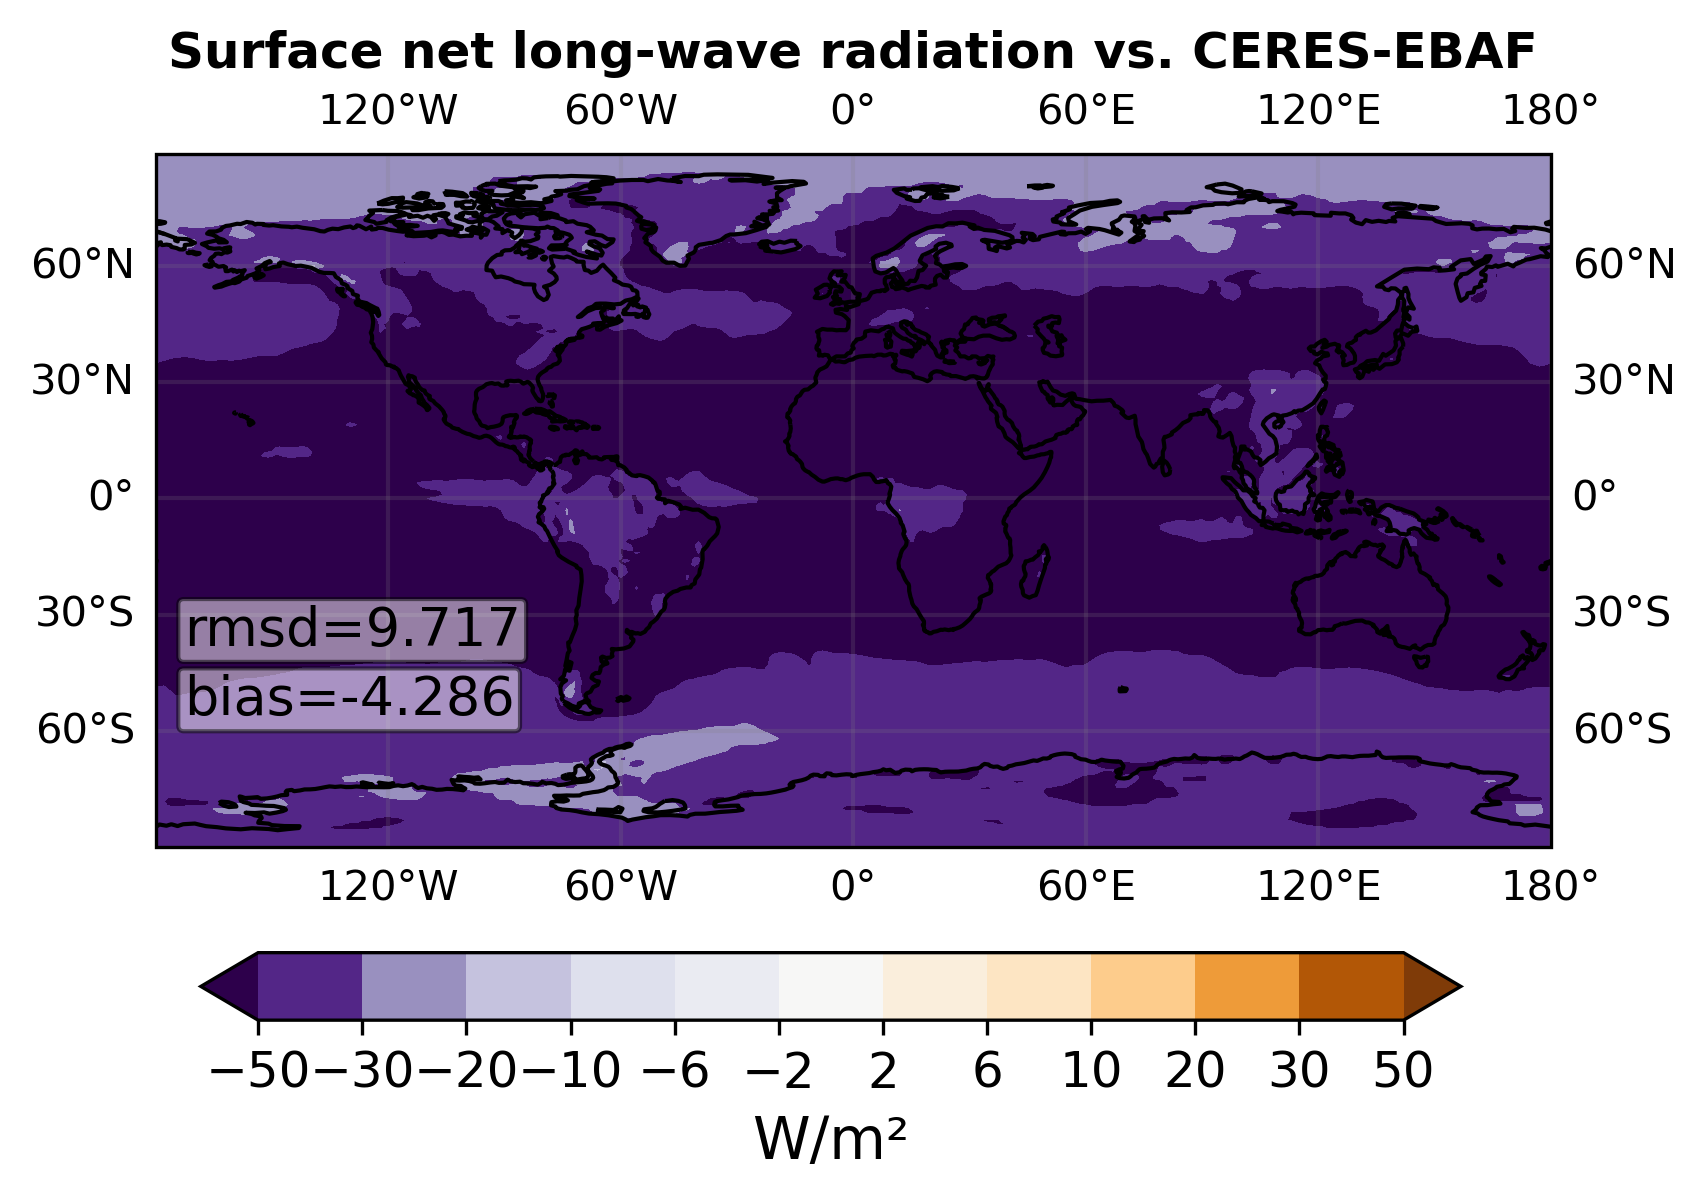

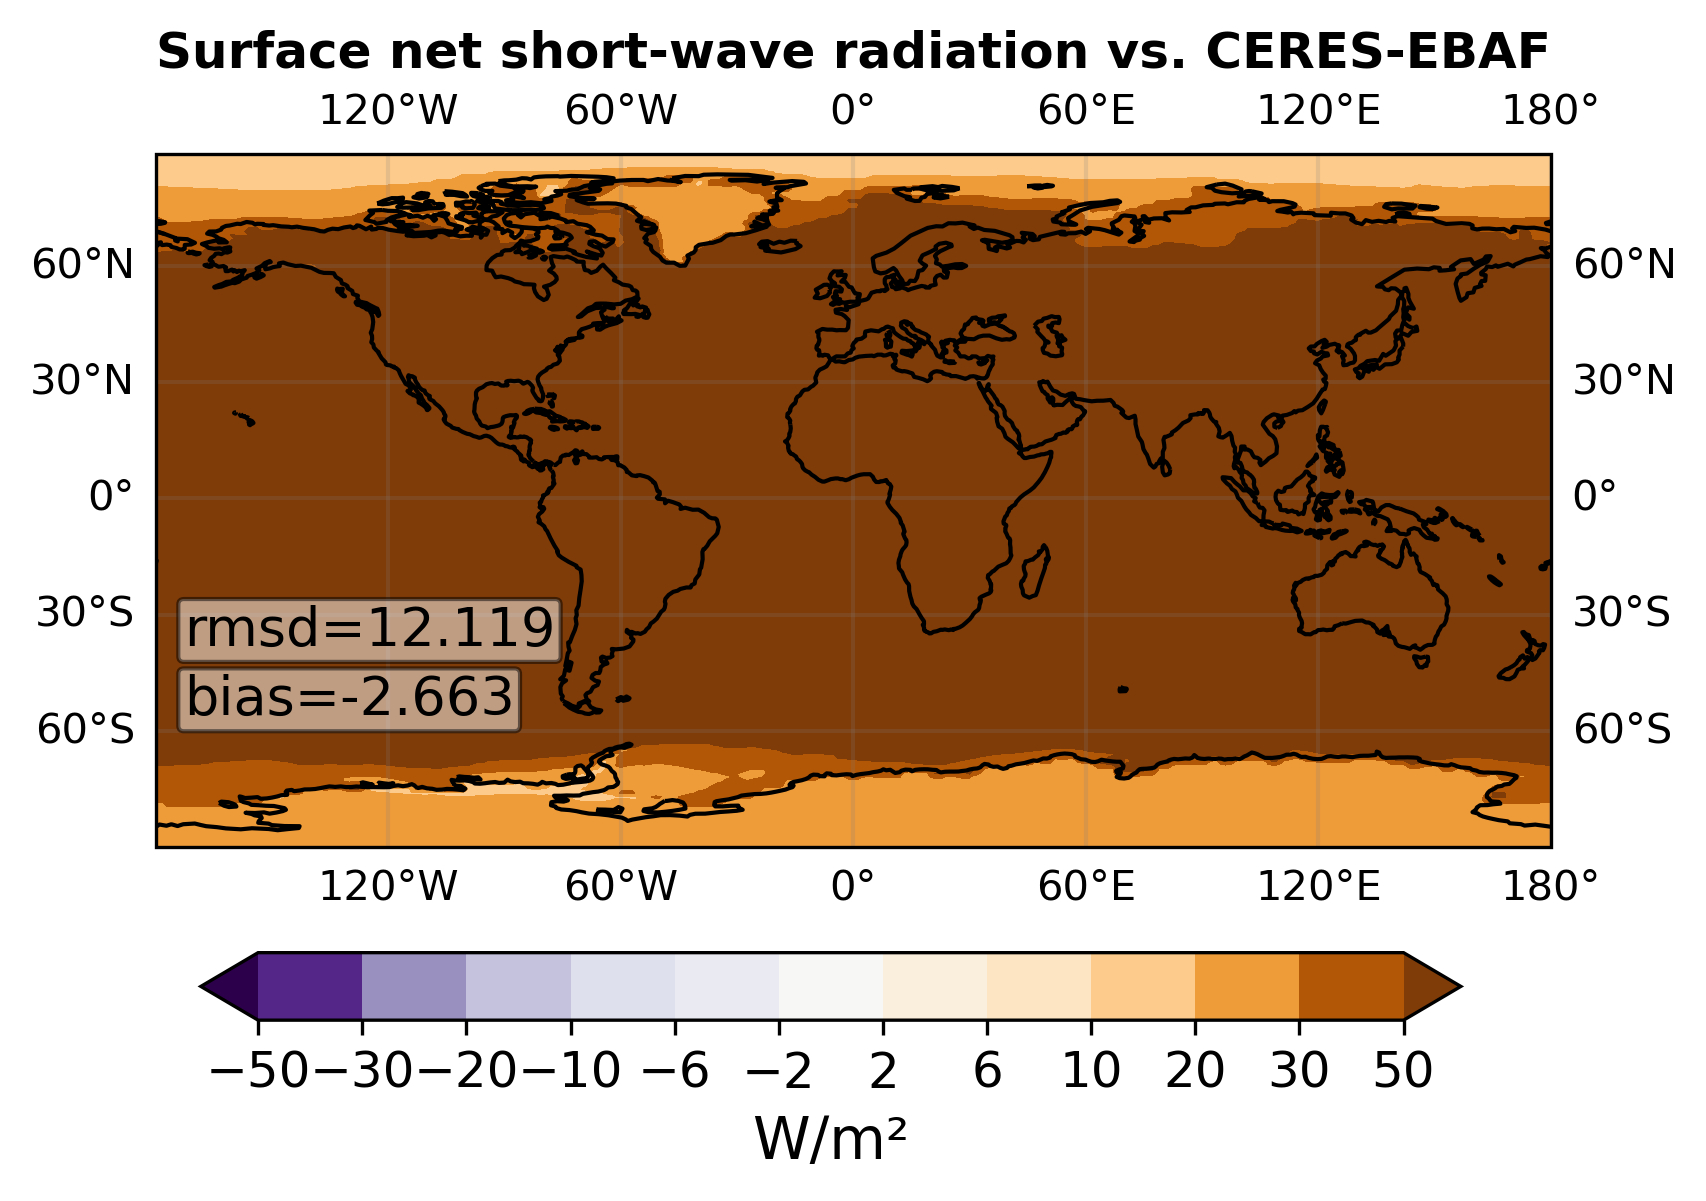

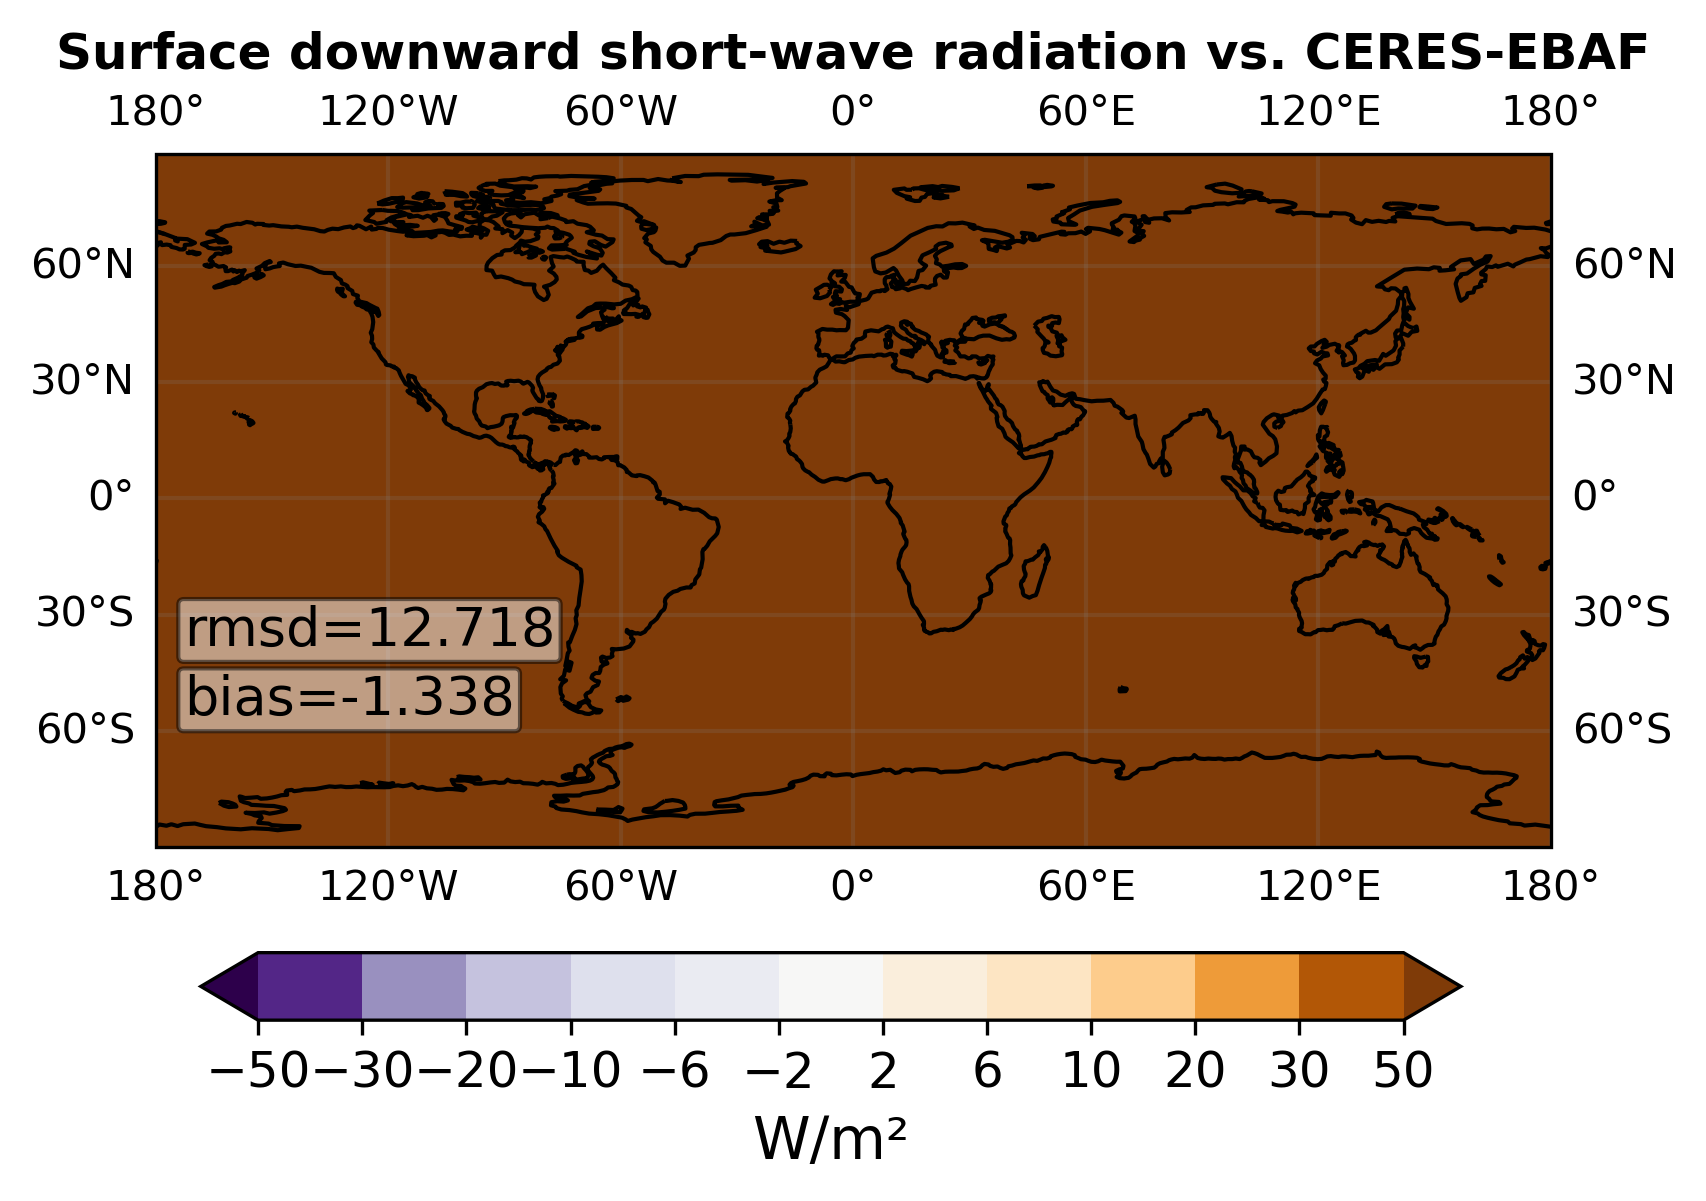

In [4]:
# Add the parent directory to sys.path and load config



# parameters cell
# parameters cell
accumulation_period = 21600  # 6 hours in seconds (if model output is 6-hourly accumulated fluxes)
out_path = save_path +  "/figures"
input_paths = [model_path]
input_names = [model_name]
exps = list(range(model_start, model_end+1))
saved_filenames=[]

climatology_files = ['CERES_EBAF_Ed4.1_Subset_CLIM01-CLIM12.nc']
climatology_path =  observation_path+'/CERES/'
res = [360, 180]
figsize=(6, 4.5)

def define_rowscol(input_paths, columns=len(input_paths), reduce=0):
    number_paths = len(input_paths) - reduce
#     columns = columns
    if number_paths < columns:
        ncol = number_paths
    else:
        ncol = columns
    nrows = math.ceil(number_paths / columns)
    return [nrows, ncol]

# Mean Deviation
def md(predictions, targets):
    return (predictions - targets).mean()

# Mean Deviation weighted
def md(predictions, targets, wgts):
    output_errors = np.average((predictions - targets), axis=0, weights=wgts)
    return (output_errors).mean()


for variable in ['str', 'ssr', 'ssrd']:
    if variable == 'str':
        variable_clim = 'sfc_net_lw_all_clim'
        title = 'Surface net long-wave radiation vs. CERES-EBAF'
    elif variable == 'ssr':
        variable_clim = 'sfc_net_sw_all_clim'
        title = 'Surface net short-wave radiation vs. CERES-EBAF'
    elif variable == 'ssrd':
        variable_clim = 'sfc_sw_down_all_clim'
        title = 'Surface downward short-wave radiation vs. CERES-EBAF'

    mapticks = [-50, -30, -20, -10, -6, -2, 2, 6, 10, 20, 30, 50]
    contour_outline_thickness = 0

    # Load CERES satobs data
    CERES_path = climatology_path + climatology_files[0]
    CERES_Dataset = Dataset(CERES_path)
    CERES_Data = OrderedDict()
    CERES_CRF = CERES_Dataset.variables[variable_clim][:]

    # Load model Data
    def load_parallel(variable, path):
        data1 = cdo.timmean(input="-remapcon,r" + str(res[0]) + "x" + str(res[1]) + " " + str(path),
                            returnArray=variable) / accumulation_period
        return data1

    data = OrderedDict()
    for exp_path, exp_name in zip(input_paths, input_names):
        data[exp_name] = {}
        datat = []
        t = []
        for exp in tqdm(exps):
            path = f"{exp_path}/oifs/atm_remapped_1m_{variable}_1m_{exp:04d}-{exp:04d}.nc"
            temporary = dask.delayed(load_parallel)(variable, path)
            t.append(temporary)

        with ProgressBar():
            datat = dask.compute(*t, scheduler='threads')
        data[exp_name][variable] = np.squeeze(datat)

    crf_sw_model = OrderedDict()
    crf_sw_model_mean = OrderedDict()

    for exp_name in input_names:
        crf_sw_model[exp_name] = np.squeeze(data[exp_name][variable])
        crf_sw_model_mean[exp_name] = np.mean(crf_sw_model[exp_name], axis=0)
        if len(np.shape(crf_sw_model_mean[exp_name])) > 2:
            crf_sw_model_mean[exp_name] = np.mean(crf_sw_model_mean[exp_name], axis=0)
    crf_sw_satobs_mean = np.mean(CERES_CRF, axis=0)

    # Longitude & Latitude handling
    lon = np.linspace(0, 359, 360)  # Ensuring consistency with data shape
    lat = np.arange(-90, 90, 1)

    crf_sw_model_mean[exp_name], lon_cyclic = add_cyclic_point(crf_sw_model_mean[exp_name], coord=lon)
    crf_sw_satobs_mean, _ = add_cyclic_point(crf_sw_satobs_mean, coord=lon)

    # Weighted RMSD and MD calculation
    coslat = np.cos(np.deg2rad(lat))
    wgts = np.sqrt(coslat)[..., np.newaxis]  # Ensure proper weighting
    
    # Ensure `wgts` is broadcasted to (lat, lon)
    wgts = np.broadcast_to(wgts, crf_sw_model_mean[exp_name].shape)
    rmsdval = sqrt(mean_squared_error(crf_sw_model_mean[exp_name], crf_sw_satobs_mean, sample_weight=wgts))
    mdval = md(crf_sw_model_mean[exp_name], crf_sw_satobs_mean, wgts)

    # Define figure layout with PlateCarree projection
    nrows, ncol = define_rowscol(input_paths)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncol, figsize=figsize, 
                             subplot_kw={'projection': ccrs.PlateCarree()}, dpi=dpi)

    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    # Loop through input names and plot
    for i, exp_name in enumerate(input_names):
        ax = axes[i]  # Use existing axis object

        ax.add_feature(cfeature.COASTLINE, zorder=3)

        # Contour plot
        imf = ax.contourf(lon_cyclic, lat, crf_sw_model_mean[exp_name],# - crf_sw_satobs_mean, 
                          cmap='PuOr_r', levels=mapticks, extend='both',
                          transform=ccrs.PlateCarree(), zorder=1)

        line_colors = ['black' for _ in imf.levels]
        imc = ax.contour(lon_cyclic, lat, crf_sw_model_mean[exp_name], 
                         colors=line_colors, levels=mapticks, 
                         linewidths=contour_outline_thickness,
                         transform=ccrs.PlateCarree(), zorder=1)

        ax.set_ylabel('W/m²')
        ax.set_xlabel('Simulation Year')
        ax.set_title(title, fontweight="bold")

        # Gridlines
        gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.2, linestyle='-')
        gl.xlabels_bottom = False

        # Bias & RMSD Text
        textrsmd = f'rmsd={round(rmsdval, 3)}'
        textbias = f'bias={round(mdval, 3)}'
        props = dict(boxstyle='round,pad=0.1', facecolor='white', alpha=0.5)

        ax.text(0.02, 0.35, textrsmd, transform=ax.transAxes, fontsize=13,
                verticalalignment='top', bbox=props, zorder=4)
        ax.text(0.02, 0.25, textbias, transform=ax.transAxes, fontsize=13,
                verticalalignment='top', bbox=props, zorder=4)

    # Colorbar
    cbar_ax_abs = fig.add_axes([0.15, 0.11, 0.7, 0.05])
    cbar_ax_abs.tick_params(labelsize=12)
    cb = fig.colorbar(imf, cax=cbar_ax_abs, orientation='horizontal', ticks=mapticks)
    cb.set_label(label="W/m²", size=14)
    cb.ax.tick_params(labelsize=12)

    # Save figure 
    ofile='_part9_rad_vs_ceres_'+variable
 
    if ofile is not None:
        plt.savefig(out_path+"/"+tripyrun_name +ofile, dpi=dpi,bbox_inches='tight')
        saved_filenames.append(out_path + ofile+'.png')

   
# Mark script as completed
update_status(SCRIPT_NAME, "Completed")


In [6]:
name=out_path+"/"+tripyrun_name +ofile
name

'/work/ab0995/a270275/runconfig/Results/AWICM3_test031/figures/AWICM3_test018part9_rad_vs_ceres_ssrd'

In [11]:
variable

'ssrd'